In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
visible_layer_size = 2
hidden_layer_size = 3
seed = 44  # Seed for random number generator
gradient_steps = 200
walker_steps = 1000


In [4]:
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
#H = random_hamiltonian(2**visible_layer_size)  # Hamiltonian
H = np.diag([-2, 0, 2, -7])  # Hamiltonian

In [5]:
walker = mcmc.Walker(steps=walker_steps)
rbm = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model_1 = Model(rbm, walker, H)  # Initializing model with RBM and Hamiltonian
model_2 = copy.deepcopy(model_1)  # Cloning model to have two copies to train on
model_3 = copy.deepcopy(model_1)
model_4 = copy.deepcopy(model_1)

In [6]:
print(f"RBM GS energy before training: {model_1.exact_energy()}")
print(f"Exact ground state energy (target): {min(np.linalg.eigvalsh(H))}")

RBM GS energy before training: (-4.373212164479464+1.8320229254166218e-18j)
Exact ground state energy (target): -7.0


In [7]:
# Training models
fd_plot_exact_list = model_1.gradient_descent(gradient_method='finite_difference', exact_dist=True, n_steps=gradient_steps)
analytic_plot_est_list = model_2.gradient_descent(gradient_method='analytical', exact_dist=False, n_steps=gradient_steps)
fd_plot_est_list = model_3.gradient_descent(gradient_method='finite_difference', exact_dist=False, n_steps=gradient_steps)
analytic_plot_exact_list = model_4.gradient_descent(gradient_method='analytical', exact_dist=True, n_steps=gradient_steps)


Gradient descent step 1, energy: (-4.373212164479464+1.8320229254166218e-18j)
Gradient descent step 2, energy: (-4.7935470118084655+0j)
Gradient descent step 3, energy: (-5.179337196482319+0j)
Gradient descent step 4, energy: (-5.5211772482258565+0j)
Gradient descent step 5, energy: (-5.814226597986851+0j)
Gradient descent step 6, energy: (-6.058082639805256+5.479161235142379e-16j)
Gradient descent step 7, energy: (-6.255920944683696-5.740673668717952e-20j)
Gradient descent step 8, energy: (-6.413216989760888+0j)
Gradient descent step 9, energy: (-6.536449648777306-2.667422901304683e-16j)
Gradient descent step 10, energy: (-6.632084047297729+0j)
Gradient descent step 11, energy: (-6.705944464338989-1.3671712967779177e-20j)
Gradient descent step 12, energy: (-6.762936017210856+0j)
Gradient descent step 13, energy: (-6.8070061212600095+1.0370746003344666e-16j)
Gradient descent step 14, energy: (-6.841236509905872+8.358600835235123e-17j)
Gradient descent step 15, energy: (-6.8679865955106

Gradient descent step 127, energy: (-6.993996960600276+4.418121190977701e-16j)
Gradient descent step 128, energy: (-6.994038583738848-4.383220215852673e-16j)
Gradient descent step 129, energy: (-6.994079789127421+0j)
Gradient descent step 130, energy: (-6.994120581845576+0j)
Gradient descent step 131, energy: (-6.994160966889176-4.280854499229506e-16j)
Gradient descent step 132, energy: (-6.994200949174268+4.247493880744262e-16j)
Gradient descent step 133, energy: (-6.994240533540566+0j)
Gradient descent step 134, energy: (-6.99427972475461+0j)
Gradient descent step 135, energy: (-6.994318527512618+4.1496238277648047e-16j)
Gradient descent step 136, energy: (-6.994356946443064+0j)
Gradient descent step 137, energy: (-6.9943949861090084-4.086170778117804e-16j)
Gradient descent step 138, energy: (-6.9944326510102215+0j)
Gradient descent step 139, energy: (-6.994469945585094-4.024107935891288e-16j)
Gradient descent step 140, energy: (-6.994506874212392+3.993586245320898e-16j)
Gradient des

Gradient descent step 49, energy: (-4.624390573185734+0j)
Gradient descent step 50, energy: (-4.8142681340200255-2.34727476172316e-16j)
Gradient descent step 51, energy: (-5.00135055576873+2.2763344022769113e-16j)
Gradient descent step 52, energy: (-5.1835765140667425+2.1953332924556556e-16j)
Gradient descent step 53, energy: (-5.358708467388049-2.1055004265635027e-16j)
Gradient descent step 54, energy: (-5.524020270889+4.0179610272407555e-16j)
Gradient descent step 55, energy: (-5.678888022099455+0j)
Gradient descent step 56, energy: (-5.821968277407457+0j)
Gradient descent step 57, energy: (-5.955250460407608+0j)
Gradient descent step 58, energy: (-6.075725533396817+3.173515564672797e-16j)
Gradient descent step 59, energy: (-6.183991373555197+0j)
Gradient descent step 60, energy: (-6.2803391160983235+0j)
Gradient descent step 61, energy: (-6.365373600867883+2.562399912629773e-16j)
Gradient descent step 62, energy: (-6.439792357366629+0j)
Gradient descent step 63, energy: (-6.50486222

Gradient descent step 168, energy: (-6.989012661361228-1.2568960171537794e-16j)
Gradient descent step 169, energy: (-6.9891490314898235+0j)
Gradient descent step 170, energy: (-6.989282504291397+1.2345429890124902e-16j)
Gradient descent step 171, energy: (-6.989413199216321-3.0598179957097416e-25j)
Gradient descent step 172, energy: (-6.989541267958907+0j)
Gradient descent step 173, energy: (-6.989666735456511+1.2022599635829284e-16j)
Gradient descent step 174, energy: (-6.989789694307353+0j)
Gradient descent step 175, energy: (-6.989910248294475+1.1815575307057723e-16j)
Gradient descent step 176, energy: (-6.990028460251047+0j)
Gradient descent step 177, energy: (-6.990144407307351+0j)
Gradient descent step 178, energy: (-6.990258162222986+1.1516791875673996e-16j)
Gradient descent step 179, energy: (-6.99036979374315-2.661076751060583e-25j)
Gradient descent step 180, energy: (-6.99047936692051+1.132503852398443e-16j)
Gradient descent step 181, energy: (-6.990586943406287+0j)
Gradient 

Gradient descent step 86, energy: (-6.6345638985570465+3.796674943328566e-16j)
Gradient descent step 87, energy: (-6.640793767692639+0j)
Gradient descent step 88, energy: (-6.646208274312154+3.6041843672341346e-16j)
Gradient descent step 89, energy: (-6.658400675289114+0j)
Gradient descent step 90, energy: (-6.665654134885706-3.602596051447591e-20j)
Gradient descent step 91, energy: (-6.670949438195366+0j)
Gradient descent step 92, energy: (-6.681519925482397+0j)
Gradient descent step 93, energy: (-6.691621069257587+0j)
Gradient descent step 94, energy: (-6.701768014182057+0j)
Gradient descent step 95, energy: (-6.712236306690528-4.517505824983271e-19j)
Gradient descent step 96, energy: (-6.723630419000032+0j)
Gradient descent step 97, energy: (-6.733522110375477+0j)
Gradient descent step 98, energy: (-6.741429988431519-5.111633508174698e-16j)
Gradient descent step 99, energy: (-6.746199867565453+7.542151721323317e-19j)
Gradient descent step 100, energy: (-6.749534647739368+0j)
Gradien

Gradient descent step 39, energy: (-6.292740299453943+0j)
Gradient descent step 40, energy: (-6.391148410868451+0j)
Gradient descent step 41, energy: (-6.475151433606095-5.142631640021535e-22j)
Gradient descent step 42, energy: (-6.546613930412792-1.2623461445765872e-19j)
Gradient descent step 43, energy: (-6.607281556079877+0j)
Gradient descent step 44, energy: (-6.658736669572322-2.270055976039692e-16j)
Gradient descent step 45, energy: (-6.702379800804917+0j)
Gradient descent step 46, energy: (-6.73942861729177+3.740943670753558e-16j)
Gradient descent step 47, energy: (-6.770927715238957+0j)
Gradient descent step 48, energy: (-6.7977643116516315+3.10552655152917e-16j)
Gradient descent step 49, energy: (-6.820686450072051-2.8393857435322684e-16j)
Gradient descent step 50, energy: (-6.840321543674751+2.602748879277822e-16j)
Gradient descent step 51, energy: (-6.857193967114309+2.392305060001388e-16j)
Gradient descent step 52, energy: (-6.871741021383585+0j)
Gradient descent step 53, e

Gradient descent step 199, energy: (-6.997823080297588+0j)
Gradient descent step 200, energy: (-6.997846917796237+0j)


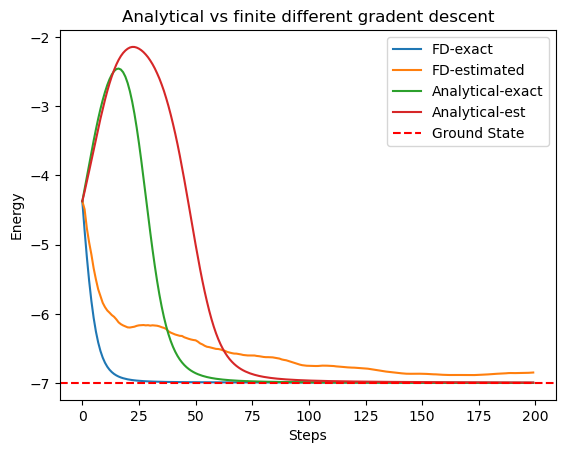

In [8]:
plt.plot(np.real(fd_plot_exact_list), label='FD-exact')
plt.plot(np.real(fd_plot_est_list), label='FD-estimated')
plt.plot(np.real(analytic_plot_exact_list), label='Analytical-exact')
plt.plot(np.real(analytic_plot_est_list), label='Analytical-est')
plt.axhline(y=min(np.linalg.eigvalsh(H)), color='red', linestyle='--', label='Ground State')
plt.title('Analytical vs finite different gradent descent')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.legend()


In [9]:
print(f"Estimated energy FD-exact: {model_1.estimate_energy()}")
print(f"Estimated energy Analytic-estimated: {model_2.estimate_energy()}")
print(f"Estimated energy FD-estimated: {model_3.estimate_energy()}")
print(f"Estimated energy Analytic-exact: {model_4.estimate_energy()}")

Estimated energy FD-exact: -6.993
Estimated energy Analytic-estimated: -6.979000000000001
Estimated energy FD-estimated: -6.824
Estimated energy Analytic-exact: -7.0
